# #04. 다양한 회귀 알고리즘

## 1. Decision Tree Regression ( 결정 트리 회귀 ) - 예측

> - 데이터를 여러개의 규칙 기반 분할을 통해 학습한다.
> - 구간 평균으로 예측을 한다.

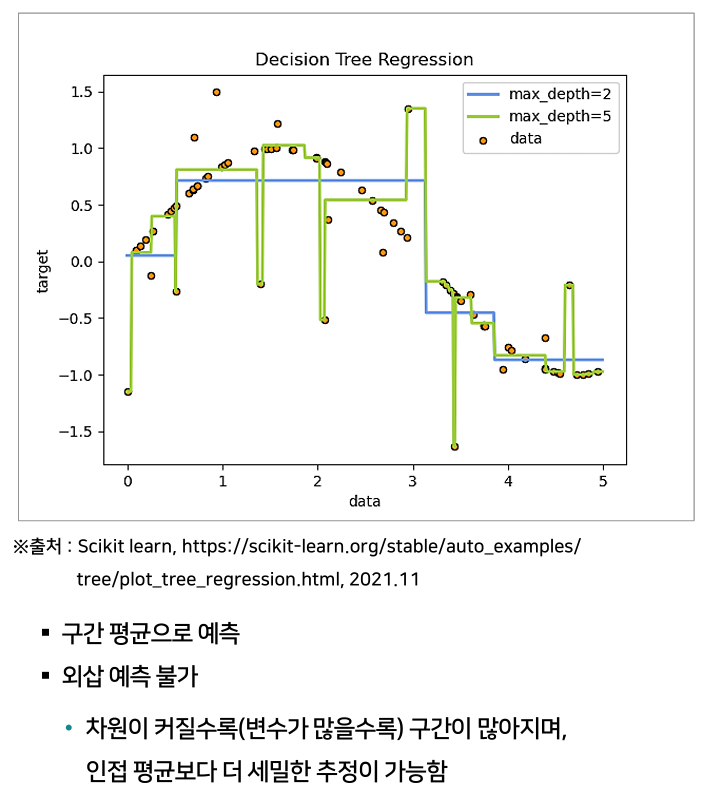

In [1]:
from IPython.display import Image
Image('img/img04_01.png', width=600)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

의사결정 나무 회귀 (결정계수) : 0.51
의사결정 나무 회귀 (MAE) : 0.60


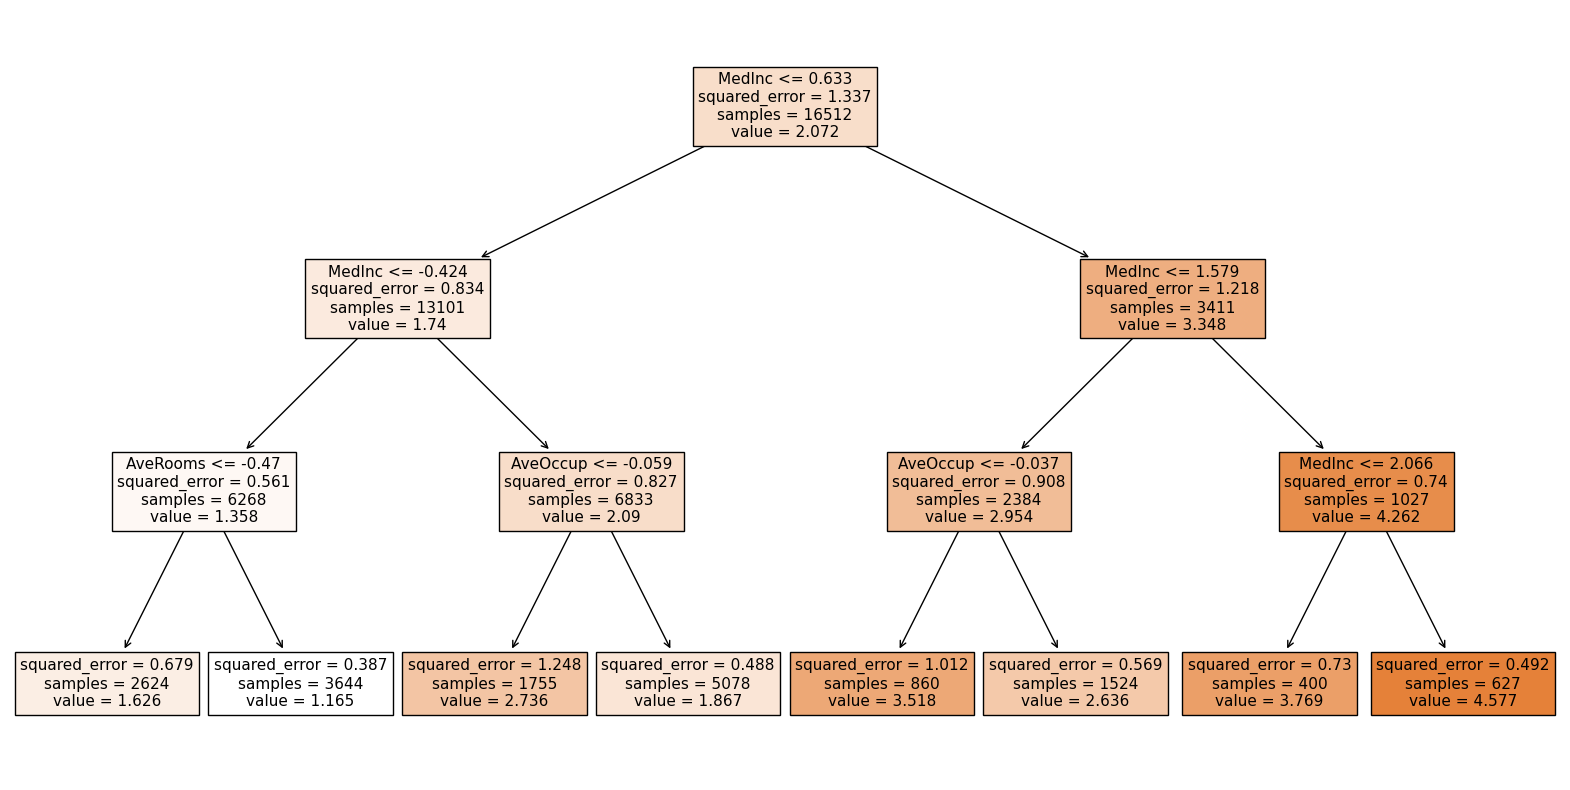

In [3]:
# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타겟 분리
x, y = california.data, california.target

# 훈련세트와 테스트세트 분리
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 생성 ( 트리의 깊이 3 ) 
tree = DecisionTreeRegressor(random_state=42, max_depth=3)

# 훈련
tree.fit(X_train, Y_train)

# 테스트 세트에 대한 예측
Y_pred = tree.predict(X_test)

# 결정계수 R2
r2 = r2_score(Y_test, Y_pred)
print('의사결정 나무 회귀 (결정계수) : {:.2f}' .format(r2))

# 평균절대오차 MAE
mae = mean_absolute_error(Y_test, Y_pred)
print('의사결정 나무 회귀 (MAE) : {:.2f}' .format(mae))

# 트리구조 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=california.feature_names, fontsize=11)
plt.show()